In [11]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

In [14]:
#Loading_Data
df = pd.read_csv('data/heart-disease.csv')

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
#Information of medical attributes for heart disease 
info = ["age","1: male, 0: female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure, anything above 130-140 is typically cause for concern"," serum cholestoral in mg/dl, above 200 is cause for concern, ","fasting blodd sugar>120mg/dL that is 1=true, 0=false, >126mg/dL signals diabetes","resting electrocardiographic results (0-nothing to ntoe,1:ST-Twave abnormality,2-Possible or definite left ventricular hypertrophy)"," maximum heart rate achieved","exercise induced angina,1=Yes,0=No","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment-0:unsloping, 1= flatsloping, 2= downslopig","number of major vessels (0-3) colored by flourosopy","thal: 1 or 3 = normal; 6 = fixed defect; 7 = reversable defect"," have disease or not (1=yes, 0=no), the predicted attribute)"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
trestbps:			resting blood pressure, anything above 130-140 is typically cause for concern
chol:			 serum cholestoral in mg/dl, above 200 is cause for concern, 
fbs:			fasting blodd sugar>120mg/dL that is 1=true, 0=false, >126mg/dL signals diabetes
restecg:			resting electrocardiographic results (0-nothing to ntoe,1:ST-Twave abnormality,2-Possible or definite left ventricular hypertrophy)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina,1=Yes,0=No
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment-0:unsloping, 1= flatsloping, 2= downslopig
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 1 or 3 = normal; 6 = fixed defect; 7 = reversable defect
target:			 have disease or not (1=yes, 0=no), the predicted attribute)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
#finding patterns in data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [17]:
#check for any missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
#count how many classes are in a target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

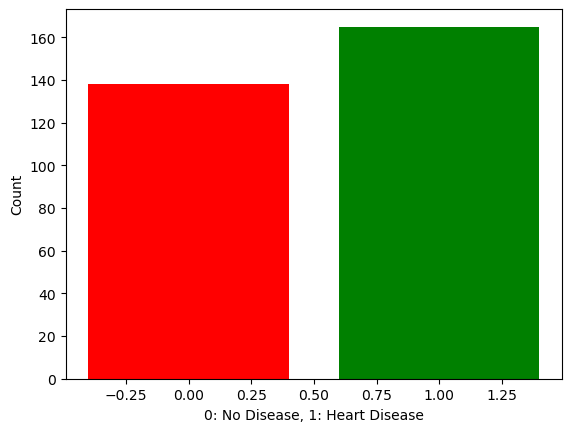

In [19]:
#classes visualization
value_counts = df['target'].value_counts()
colors = ['green', 'red']
plt.bar(value_counts.index, value_counts.values, color=colors)
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count')
plt.show()

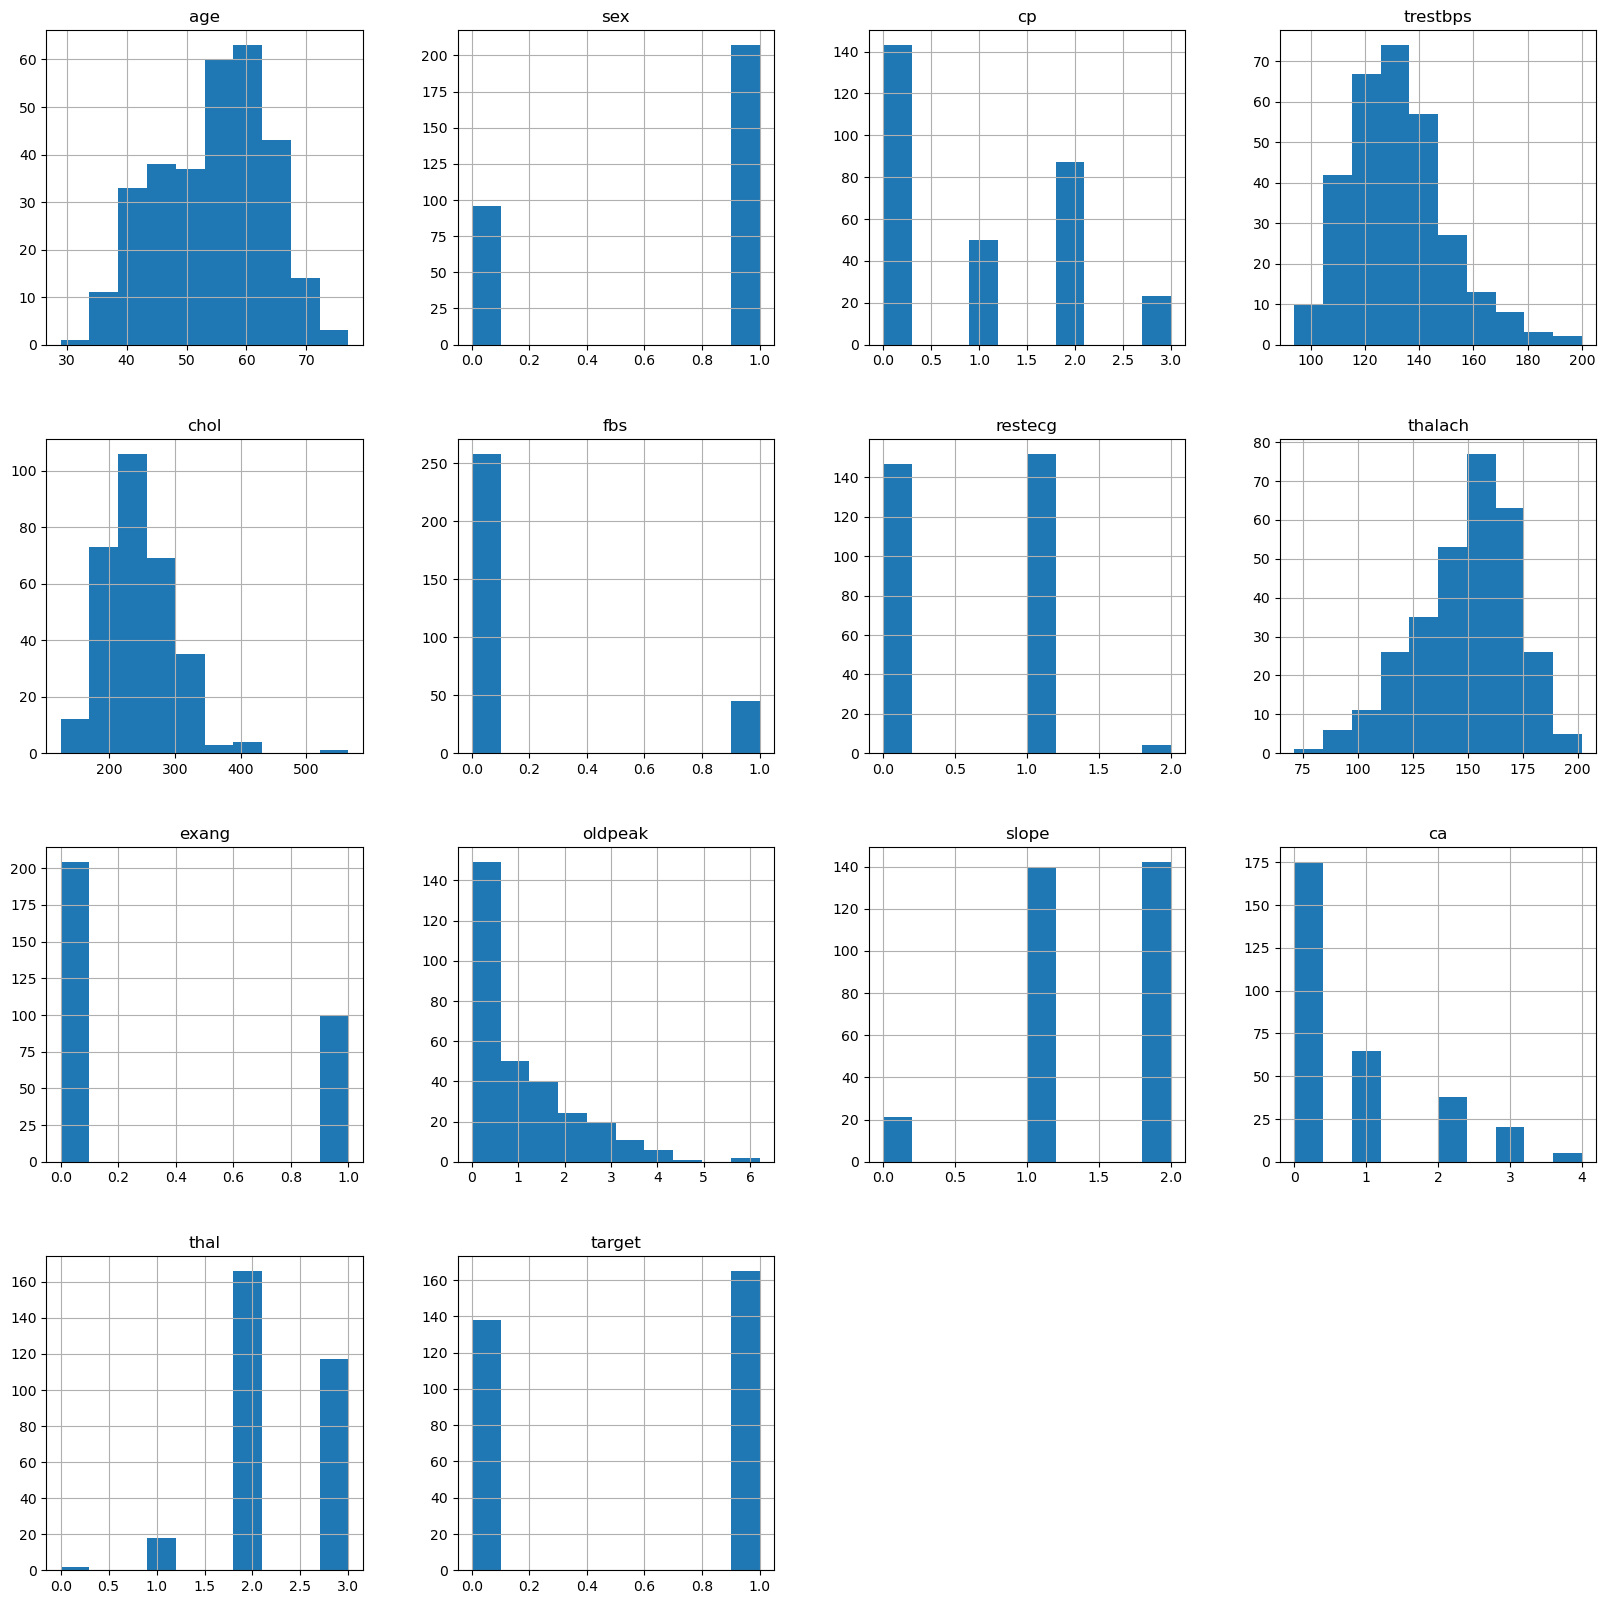

In [26]:
df.hist(figsize=(20,20))
plt.show()

Heart disease frequency according to Sex

In [30]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [31]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [32]:
72/(24+72), 93/(114+93)

(0.75, 0.4492753623188406)

We can see that based on existing data, there are 75% chances that female can have a heart disease. For male, there are 45% chance.

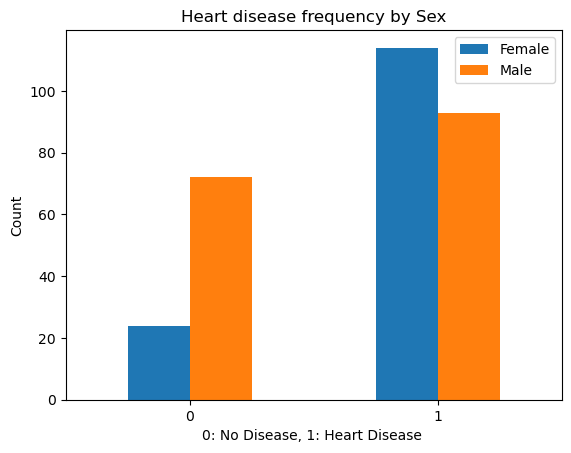

In [34]:
# visualize the data
pd.crosstab(df['sex'], df['target']).plot(kind='bar');
plt.title('Heart disease frequency by Sex')
plt.xlabel('0: No Disease, 1: Heart Disease ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);